# Linear regression for computational neuroscience

Z. Shi (2024)

In neurobiological modeling, we often work with arrays of variables. For instance, these arrays can represent the activities of all neurons in a network at a specific time, the firing rates of neurons during various small time intervals, or the weights of all synapses affecting a postsynaptic cell. The most suitable way to describe and analyze the behavior of these arrays is through the language of vectors and matrices.

## Matrix and Vector (Optional)

There are several arithmetic operations defined on vectors and matrices.

In [3]:
import numpy as np

a = np.array([1,2,3])
b = np.array([4,5,6])
print(3*a)
print(a - b)


[3 6 9]
[-3 -3 -3]


In [4]:
x = np.random.random((2,3))
y = np.random.random((2,3))
print(x)
print(y)
print(x+y)

[[0.28221499 0.53825175 0.43595973]
 [0.34342708 0.38806844 0.55377176]]
[[0.20735471 0.7348756  0.61477561]
 [0.76100155 0.13661949 0.69195585]]
[[0.4895697  1.27312735 1.05073534]
 [1.10442863 0.52468793 1.24572761]]


#### Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. 



In [7]:
x = np.array([[1,2,3], 
			  [4,5,6], 
			  [7,8,9], 
			  [10, 11, 12]])
print(x.shape)
xm = np.mean(x, axis=0)
print(xm.shape)
x-xm

(4, 3)
(3,)


array([[-4.5, -4.5, -4.5],
       [-1.5, -1.5, -1.5],
       [ 1.5,  1.5,  1.5],
       [ 4.5,  4.5,  4.5]])

### Multiplication

There are three types of multiplications for matrices. 

1. __Matrix multiply__

$$A_{m,n} B_{n,p} = 
 \begin{pmatrix}
  a_{0,0} &  \cdots & a_{0,n-1} \\
  a_{1,0} &  \cdots & a_{1,n-1} \\
  \vdots  &  \ddots & \vdots  \\
  a_{m-1,1}  & \cdots & a_{m-1,n-1} 
 \end{pmatrix} \begin{pmatrix}
  b_{0,0} &  \cdots & b_{0,p-1} \\
  b_{1,0} &  \cdots & b_{1,p-1} \\
  \vdots  &  \ddots & \vdots  \\
  b_{n-1,1}  & \cdots & b_{n-1,p-1} 
 \end{pmatrix} \\
 = \begin{pmatrix}
  \sum_j a_{0,j}b_{j,o} &  \cdots & \sum_j a_{m-1,j}b_{j,o} \\
  \sum_j a_{1,j}b_{j,o} &  \cdots & \sum_j a_{m-1,j}b_{j,1} \\
  \vdots  &  \ddots & \vdots  \\
  \sum_j a_{m-1,j}b_{j,o}  & \cdots & \sum_j a_{m-1,j}b_{j,p-1} 
 \end{pmatrix} $$

In [8]:
X = np.array([[1,2,3],
			  [4,5,6]])
Y = np.array([[7,8],
			  [9,10],
			  [11,12]])

In [9]:
# multiple in python is X.dot(Y), or np.dot(X,Y)
# please check the finnal output dimension!
X.dot(Y)

array([[ 58,  64],
       [139, 154]])

In [10]:
# Question: What is the output of Y.dot(X)?


__2. Inner Product__

$X\cdot Y = [x_{ij}*y_{ij}]$

Note, inner product must be applied to the matrices with the __same dimension__!

In [11]:
# please try to run X*Y, and see what is the output. 

X*Y.T 

array([[ 7, 18, 33],
       [32, 50, 72]])

#### Example

Suppose we have 4 neurons with initial values `[1, 2, 1, 2]` and they all send their signals to a postsynaptic cell with weights `[0.2, 0.3, 0.5, 0.6]`. The input received by the postsynaptic cell, denoted as `I`, will be:

$I = \sum(1,2,1,2) \cdot (0.2,0.3,0.5,0.6) = (1,2,1,2) 
\begin{pmatrix}0.2 \\ 0.3 \\ 0.5 \\ 0.6\end{pmatrix}$

In [12]:
# implementation
neurons = np.array([1,2,1,2])
weights = np.array([0.2, 0.3, 0.5, 0.6])
I = np.sum(neurons*weights)
print(I)

2.5


In [13]:
# alternative implementation using matrix
np.inner(weights, neurons)

2.5

__3. Outer product__

please try yourself to see what the output of $neurons^T\cdot weights$ is. 

In [14]:
# 
np.outer(weights, neurons)

array([[0.2, 0.4, 0.2, 0.4],
       [0.3, 0.6, 0.3, 0.6],
       [0.5, 1. , 0.5, 1. ],
       [0.6, 1.2, 0.6, 1.2]])

## 1. Simple Linear Regression

Linear regression aims to establish a relationship between the output $y$ and the input $X$ in a linear manner. Mathematically, if $\hat{y}$ represents the predicted value, the relationship can be expressed as:

$$\hat{y}(w, x) = w_0 + w_1 x_1 + ... + w_p x_p$$

Here, the vector $w = (w_1,..., w_p)$ represents the coefficients (`coef_`), and $w_0$ represents the intercept (`intercept_`).

`LinearRegression` fits a linear model with coefficients $w = (w_0, ..., w_p)$ to minimize the residual sum of squares between the observed targets in the dataset and the targets predicted by the linear approximation. Mathematically, it solves the following problem:

$$ \min_{w} || X w - y||_2^2$$

![alt text](https://scikit-learn.org/stable/_images/sphx_glr_plot_ols_001.png)

### 5 Steps for Linear Regression

1. Import necessary packages
2. Provide the data
3. Create a regression model and fit it with the existing data
4. Evaluate the model's performance (goodness of fit)
5. Use the model for making predictions



### Linear Regression using `statsmodels`

`statsmodels` offers extensive statistical models, tests, and data exploration tools, providing more detailed statistics.

`pingouin` also supports simple linear regression.


In [ ]:
!pip install pingouin

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
import pingouin as pg
%matplotlib inline

Let's use this [dataset][sdata], which contains the salary and experience data. We'll explore the data and perform linear regression to understand the relationship between years of experience and salary.

[sdata]: https://raw.githubusercontent.com/contactsunny/data-science-examples/master/salaryData.csv

In [17]:
# import csv file using pandas.read_csv
dataset = pd.read_csv('https://raw.githubusercontent.com/contactsunny/data-science-examples/master/salaryData.csv')

dataset.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


Seaborn `lmplot` provides a convenient interface to visualize the relationship between two variables.

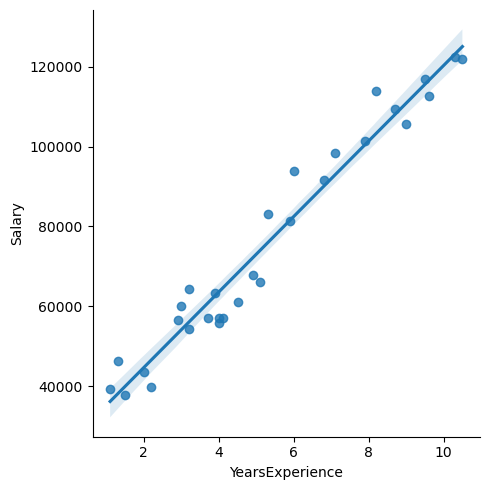

In [18]:
sns.lmplot(data = dataset, x = 'YearsExperience', y = 'Salary')

In `statsmodels`, linear regression is referred to as 'Ordinary Least Squares' (OLS). There are other types of linear regression models available, such as Generalized Least Squares, Weighted Least Squares, and Linear Mixed Effects Models, which we will not cover here. For more information on these models, please refer to [the official website](https://www.statsmodels.org/dev/examples/index.html#linear-regression-models).

There are two ways to perform regression:

1. Using Numpy arrays
2. Using Pandas DataFrame with formulas

In [19]:
# Method 1: Numpy arrays, you need to explicitly specify the column of constant
Xc = sm.add_constant(dataset.YearsExperience)
# linear model OLS
model = sm.OLS(dataset.Salary,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           1.14e-20
Time:                        16:04:17   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# Method 2: using formula
model = smf.ols(formula = 'Salary ~ YearsExperience', data = dataset).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           1.14e-20
Time:                        10:39:53   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Both methods give the same results. The latter with formula is easier to understand. 

#### Introduction to Formulas with `statsmodels`

In `statsmodels`, formulas provide a convenient way to specify statistical models using a string representation. The formula syntax is similar to R and allows you to define the relationship between the dependent and independent variables clearly.

For example:
- `y ~ x` specifies a simple linear regression with `y` as the dependent variable and `x` as the independent variable.
- `y ~ x + z` specifies a multiple linear regression with `y` as the dependent variable and `x` and `z` as independent variables.
- `y ~ x * z` includes both the main effects of `x` and `z` and their interaction term `x:z`.

Using formulas can make the model specification more readable and easier to understand, especially when dealing with complex models.

## 2. Multivariate linear regression

Here we use our recently published multisensory contextual study to illustrate multivariate regression:

Chen, S., Shi, Z., Müller, H. J., & Geyer, T. (2021). Multisensory visuo-tactile context learning enhances the guidance of unisensory visual search. Scientific Reports, 11(1), 9439. https://doi.org/10.1038/s41598-021-88946-6

In this study, we compared multisensory learning in different configurations (Old vs. New) and different multisensory environments. The original study used hierarchical drift-diffusion model (HDDM) and partial pooling methods to estimate HDDM parameters, which is more complex than what we will do here.

Here, we will demonstrate that behavioral data can also be estimated using simple linear regression to interpret the findings. 

#### data description

- subj_idx: subject index
- condition: multisensory condition (Visual vs. Tactile, Old vs. New)
- epoch: learning epoch (1-8)
- rt: reaction time

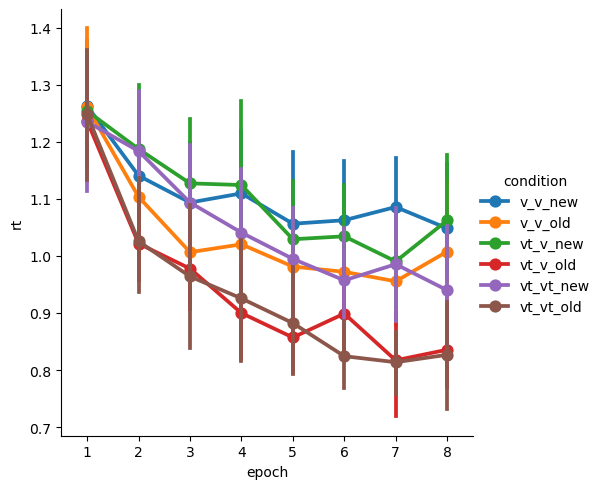

In [20]:
# first load data and visualize it. 
data = pd.read_csv('https://osf.io/58wqy/download')
mdata = data.groupby(['subj_idx','condition','epoch']).rt.mean().reset_index()
sns.catplot(data = mdata, kind = 'point', 
                    x = 'epoch', y = 'rt', hue = 'condition')


The above figure illustrates a typical procedural learning effect. Initially, reaction times are slow but gradually become faster, eventually reaching a plateau. In the original paper, we used an exponential function to model this effect: $RT = RT_0 + \Delta e^{-\alpha N}$, where $N$ represents the epoch number.


To simplify our analysis, we apply a log transformation to the epoch variable. This transformation helps us examine if there is a linear relationship between the log-transformed epochs and reaction time (RT). The rationale behind this approach is that the learning benefits diminish as the number of epochs increases. Consequently, achieving the same reduction in RT requires more epochs (or blocks).

The above exponential function can be approximated by a linear function in the log-transformed space: $\ln(RT-RT_0) = a - b \ln(N)$.

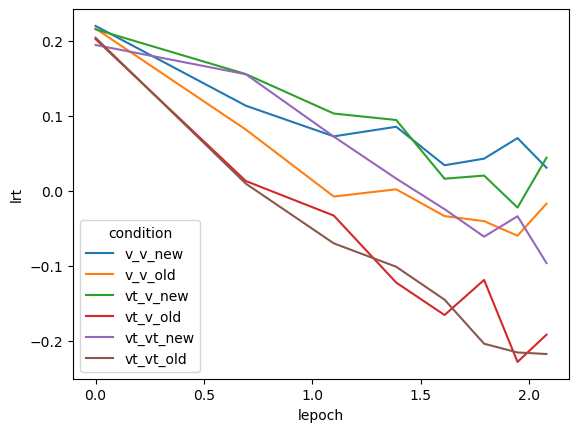

In [22]:
#if we plot in log-scale for x-axis
mdata['lepoch']  = np.log(mdata.epoch)
mdata['lrt'] = np.log(mdata.rt)
mm = mdata.groupby(['lepoch','condition']).lrt.mean().reset_index()
f = sns.lineplot(data = mm, 
                    x = 'lepoch', y = 'lrt', hue = 'condition')
plt.show()


For illustration purposes, we will focus only on the visual-tactile conditions.

In [25]:
vt.groupby('lepoch').lrt.mean().reset_index()

,lepoch,lrt
0,0.000000,0.199450
1,0.693147,0.082697
2,1.098612,0.001376
3,1.386294,-0.042156
4,1.609438,-0.084521
5,1.791759,-0.132181
6,1.945910,-0.124399
7,2.079442,-0.156642


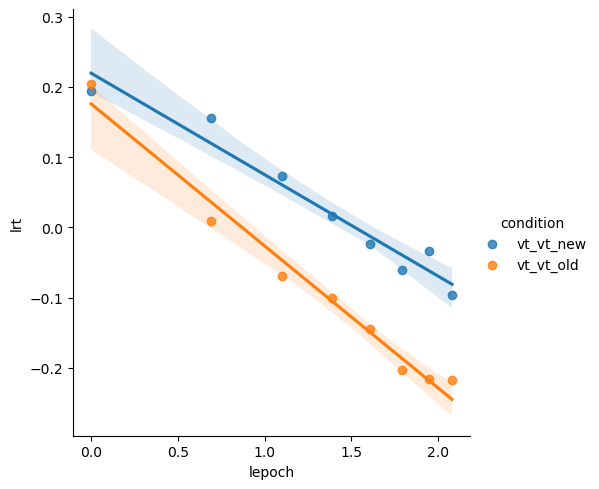

In [26]:
vt = mdata.query('condition == "vt_vt_new" | condition == "vt_vt_old"')
# visualize
sns.lmplot(data = vt.groupby(['lepoch','condition']).lrt.mean().reset_index(), 
		   x = 'lepoch', y = 'lrt', hue = 'condition')

To model both conditions, we should first establish the type of linear models to use.

* H1: Assume that the 'old' and 'new' conditions differ only in the intercept, not in the learning rate.
* H2: Assume there is an interaction between the context (old/new) and procedural learning (epochs).

H1:

$$\ln(RT) = a_0 + a_{d} + b \cdot \ln(Epoch), $$
where $a_d$ is the difference between the old and new. 

H2: 

$$\ln(RT) = a_0 + a_{d} + (b_0+b_d) \cdot \ln(Epoch), $$
where $b_d$ is the difference in the slope between two conditions. 



In [27]:
# apply linear regression (assumption with interactions)
model1 = smf.ols(formula = 'lrt ~ lepoch*condition', data = vt).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lrt   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     30.31
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           1.93e-16
Time:                        16:30:26   Log-Likelihood:                 39.636
No. Observations:                 224   AIC:                            -71.27
Df Residuals:                     220   BIC:                            -57.62
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.2196      0.043      5.051      0.000       0.134       0.305
condition[T.vt_vt_old]           -0.0437      0.061     -0.711      0.478      -0.165       0.077
lepoch                           -0.1445      0.029     -4.918      0.000      -0.202      -0.087
lepoch:condition[T.vt_vt_old]    -0.0578      0.042     -1.390      0.166      -0.140       0.024
==============================================================================
Omnibus:                       14.289   Durbin-Watson:                   0.922
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.494
Skew:                          -0.560   Prob(JB):                     0.000432
Kurtosis:                       3.635   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Summary of the regression analysis

It is important to journal the results and interpretations during the analysis. 

__Your task: readout the results and interpret the findings.__

???



Note that in the above regression, we have a categorical variable `condition` (Old and New). In linear regression, categorical variables are first converted into dummy variables. Here:

$$\ln(RT) = a_0 + a_{old} + (b_0 + b_{old})\cdot \ln(\text{Epoch})$$

This means that the model assumes different intercepts and slopes for the 'new' and 'old' conditions. The 'new' condition has intercept $a_0$ and slope $b_0$, while the 'old' condition has intercept $a_0 + a_{old}$ and slope $b_0 + b_{old}$.



The above regression shows that there were significant negative slope and positive intercept, but the differences between the old and new condition, indicated by the $a_{old}, b_{old}$, was not significance. 

**Why? and possible reasons?**


Alternative model: No interaction. 

In [28]:
# alternative model: no interaction (i.e., the slope were the same)
model2 = smf.ols(formula = 'lrt ~ lepoch + condition', data = vt).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lrt   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     44.32
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           6.56e-17
Time:                        16:38:08   Log-Likelihood:                 38.656
No. Observations:                 224   AIC:                            -71.31
Df Residuals:                     221   BIC:                            -61.08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.2579      0.034      7.649      0.000       0.191       0.324
condition[T.vt_vt_old]    -0.1203      0.027     -4.390      0.000      -0.174      -0.066
lepoch                    -0.1734      0.021     -8.328      0.000      -0.214      -0.132
==============================================================================
Omnibus:                       12.342   Durbin-Watson:                   0.926
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.937
Skew:                          -0.523   Prob(JB):                      0.00155
Kurtosis:                       3.541   Cond. No.                         5.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
#  model 3: with an interaction, but did not differ in intercept
model3 = smf.ols(formula = 'lrt ~ lepoch + lepoch:condition', data = vt).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    lrt   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     45.32
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           3.22e-17
Time:                        16:40:46   Log-Likelihood:                 39.379
No. Observations:                 224   AIC:                            -72.76
Df Residuals:                     221   BIC:                            -62.52
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.1978      0.031      6.440      0.000       0.137       0.258
lepoch                           -0.1313      0.023     -5.780      0.000      -0.176      -0.087
lepoch:condition[T.vt_vt_old]    -0.0842      0.018     -4.564      0.000      -0.121      -0.048
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   0.914
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.146
Skew:                          -0.571   Prob(JB):                     0.000312
Kurtosis:                       3.653   Cond. No.                         5.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The above three models showed different significances based on what you assumed for respective models. 

The question arises: __which model is the best model?__

In the output of model summary, you can find one key parameter `Adjusted R-squared`. The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors. In other words, compared to the unadjusted R-squared, there is penalty in adding more predictors (variables). 

The adjusted R-squared are relative close. Model 3 was the best among three candidates (0.284 vs. 0.283 and 0.280). 

One issue we haven't addressed in the above example is that the experimental design was within-subject design, but the simple linear regression simply pooled all data together! The individual difference may weaken the statistical inference. We address this in the next section using "Linear mixed model". 

## 3. Linear Mixed model

In the standard linear regression, all data points are treated as independent. However, in most behavioral studies, we have within-subject design, which help us to disassoicate the individual difference from the main manipulation. 

The linear mixed model includes unique effects for individual subjects, which can extract those individual difference from the parameters estimates. 


Consider a simple regression,

$$Y = a + b X + \epsilon$$

If we assume the intercept may vary among participants, but individual differences may cancel out each other in the group-level intercept, we have the following mixed model:

$$ Y = a + a_{ind} + bX  + \epsilon,$$

where $a_{ind} \sim N(0, \sigma_a)$. 

If we further assume that individuals have different slopes as well, we will have

$$Y = a + a_{ind} + (b + b_{ind})X  + \epsilon,$$
where  $b_{ind} \sim N(0, \sigma_b)$.

In [30]:
# mixed model: Intercept difference
mix1 = smf.mixedlm('lrt ~ lepoch + condition', data = vt, groups = vt.subj_idx)
res1 = mix1.fit()
res1.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
              Mixed Linear Model Regression Results
==================================================================
Model:                 MixedLM     Dependent Variable:     lrt    
No. Observations:      224         Method:                 REML   
No. Groups:            14          Scale:                  0.0202 
Min. group size:       16          Log-Likelihood:         91.4178
Max. group size:       16          Converged:              Yes    
Mean group size:       16.0                                       
------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept               0.258    0.047   5.494 0.000  0.166  0.350
condition[T.vt_vt_old] -0.120    0.019  -6.335 0.000 -0.157 -0.083
lepoch                 -0.173    0.014 -12.018 0.000 -0.202 -0.145
Group Var               0.023    0.070                            
==================================================================

"""

In [31]:
# mixed model with 2 random effects
mix2 = smf.mixedlm("lrt ~ lepoch* condition", data = vt, groups = vt.subj_idx, re_formula='~lepoch')
res2 = mix2.fit()
res2.summary()

/Users/strongway/miniconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Mixed Linear Model Regression Results
========================================================================
Model:                   MixedLM       Dependent Variable:       lrt    
No. Observations:        224           Method:                   REML   
No. Groups:              14            Scale:                    0.0181 
Min. group size:         16            Log-Likelihood:           94.6568
Max. group size:         16            Converged:                Yes    
Mean group size:         16.0                                           
------------------------------------------------------------------------
                              Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------
Intercept                      0.220    0.051  4.277 0.000  0.119  0.320
condition[T.vt_vt_old]        -0.044    0.040 -1.081 0.279 -0.123  0.035
lepoch                        -0.144    0.026 -5.578 0.000 -0.195 -0.094
lepoch:condition[T.vt_vt_old] -0.058    0.027 -2.116 0.034 -0.111 -0.004
Group Var                      0.025    0.094                           
Group x lepoch Cov            -0.004    0.034                           
lepoch Var                     0.004    0.020                           
========================================================================

"""

To compare multiple mixed models, you can use the likelihood values shown in the summaries. The likelihood value is a measure of how well the model fits the data. When comparing models, a higher likelihood value indicates a better fit.
 
Other criteria for multiple linear mixed-effects models include:
1. **Likelihood Ratio Test (LRT)**: Compares the likelihoods of two nested models. 
   The model with the higher likelihood is preferred if the difference is statistically significant.
2. **Akaike Information Criterion (AIC)**: Balances model fit and complexity. 
    Lower AIC values indicate a better model.
3. **Bayesian Information Criterion (BIC)**: Similar to AIC but includes a stronger penalty for models with more parameters. 
    Lower BIC values indicate a better model.
4. **Cross-Validation**: Evaluates model performance on different subsets of the data. 
    A model that performs well across different subsets is preferred.

 These criteria help in selecting the most appropriate model that balances goodness of fit and model complexity.


## Conclusion

Linear regression is the basic modeling tool when the independent  and dependent variables both are continuous (interval scales). Using mixed linear models you could reduce the estimation errors by removing the inter-subject variabilities.  

# Practice

In the following, we will use one experimental dataset to perform linear regression and mixed linear model.

The data comes from a study on influences of memory load on duration reproduction (Zang et al., 2024). The datasets are available in my github [repository](https://github.com/msenselab/working_memory_reproduction/tree/main).

The data contains the following important columns (variables) for the current analysis:

- `WMSize`: Working memory size (1, 3, 5)
- `curDur`: Current duration
- `repDur`: Reproduced duration
- `NSub`: Number of subjects
- `valid`: Validity of the trial (1: valid, 0: invalid)

In [41]:
data = pd.read_csv('https://raw.githubusercontent.com/msenselab/working_memory_reproduction/refs/heads/main/data/Exp2.csv')
mReproduction = data.query('valid == 1').groupby(['NSub','WMSize','curDur']).repDur.mean().reset_index()
mReproduction.columns = ['NSub','Memory_Load','Duration','Reproduction']
mReproduction.head()

,NSub,Memory_Load,Duration,Reproduction
0,1,1,0.5,0.739317
1,1,1,0.8,0.975967
2,1,1,1.1,1.093963
3,1,1,1.4,1.085979
4,1,1,1.7,1.220651


Let's quickly visualized the average reproduced duration for each working memory size using seaborn `lmplot`. 



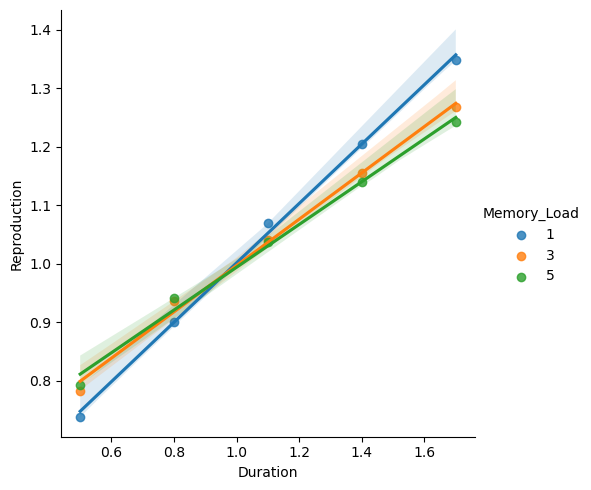

In [ ]:
# visualize average mean reproduction using lmplot
# FIXME, please fix the following code
sns.lmplot(data = (mReproduction.FIXME)
				   .Reproduction.mean().reset_index()), 
		   x = 'Duration', y = 'Reproduction', hue = 'Memory_Load')

__Observation:__

The above figure shows that reproduced duration increases with the given duration, but this increase is shallower for high memory loads. In other words, the central tendency effect was higher for high memory loads.

Additionally, we see three regression lines crossing at the middle range of the duration. This suggests that in all conditions, the average reproduced duration may converge to the middle range duration. The intercept of the regression captures the intercept at duration of 0. Here, however, we want to know the intercept around the middle range of the duration. For this reason, we will center the duration variable around the middle range of the duration.




In [ ]:
# center the Duration to the mean 1.1
# FIXME, not runable
mReproduction['cDuration'] = mReproduction.Duration - FIXME
mReproduction.head()

,NSub,Memory_Load,Duration,Reproduction,cDuration
0,1,1,0.5,0.739317,-0.6
1,1,1,0.8,0.975967,-0.3
2,1,1,1.1,1.093963,0.0
3,1,1,1.4,1.085979,0.3
4,1,1,1.7,1.220651,0.6


In [ ]:
# conduct linear regression using statsmodels
# FIXME, not runable
model = smf.ols(formula = 'FIXME A FORMULA HERE', 
				data = mReproduction).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Reproduction   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     168.2
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           2.52e-58
Time:                        17:19:50   Log-Likelihood:                 160.30
No. Observations:                 240   AIC:                            -312.6
Df Residuals:                     236   BIC:                            -298.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0560      0.017     62.512      0.000       1.023       1.089
cDuration                 0.5298      0.040     13.304      0.000       0.451       0.608
Memory_Load              -0.0054      0.005     -1.099      0.273      -0.015       0.004
cDuration:Memory_Load    -0.0355      0.012     -3.048      0.003      -0.059      -0.013
==============================================================================
Omnibus:                        3.291   Durbin-Watson:                   1.331
Prob(Omnibus):                  0.193   Jarque-Bera (JB):                3.124
Skew:                           0.279   Prob(JB):                        0.210
Kurtosis:                       3.031   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Your task: Analysis Note and Interpretation__

???
???

Given that this experiment was a within-subject design, we should consider the individual differences in the analysis. We will use the linear mixed model to estimate the parameters.

In [ ]:
# using mixed model smf.mixedlm() to account for the random effect
# FIXME, not runable
model = smf.mixedlm('FIXME A FORMULA HERE', 
					data = mReproduction, 
					groups = FIXME).fit()
model.summary()

/Users/strongway/miniconda3/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
             Mixed Linear Model Regression Results
================================================================
Model:              MixedLM   Dependent Variable:   Reproduction
No. Observations:   240       Method:               REML        
No. Groups:         16        Scale:                0.0119      
Min. group size:    15        Log-Likelihood:       164.0918    
Max. group size:    15        Converged:            Yes         
Mean group size:    15.0                                        
----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept              1.056    0.021 49.170 0.000  1.014  1.098
cDuration              0.530    0.035 15.235 0.000  0.462  0.598
Memory_Load           -0.005    0.004 -1.259 0.208 -0.014  0.003
cDuration:Memory_Load -0.036    0.010 -3.491 0.000 -0.055 -0.016
Group Var              0.004    0.016                           
================================================================

"""

## Resources

* [Linear Algebra for Theoretical Neuroscience by Ken Miller](http://www.columbia.edu/cu/neurotheory/Ken/math-notes/) 
* [Mathematics for Computational Neuroscience & Imaginng by John Porrill.](https://www.sheffield.ac.uk/polopoly_fs/1.13304!/file/maths.pdf) 
* [Linear Mixed Effect models Examples](https://github.com/statsmodels/statsmodels/blob/main/examples/notebooks/mixed_lm_example.ipynb)